In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import os
from collections import Counter

In [ ]:

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data(label_mode="fine")


x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


y_train = y_train.flatten()
y_test = y_test.flatten()


class_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
    'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]


In [19]:
print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])

Training samples: 50000
Testing samples: 10000


In [ ]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                  kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),

    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[lr_scheduler])

model.save('cifar100_cnn_model.h5') 

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 197ms/step - accuracy: 0.1224 - loss: 4.7800 - val_accuracy: 0.1909 - val_loss: 4.1575 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 148s 189ms/step - accuracy: 0.2346 - loss: 3.9160 - val_accuracy: 0.3051 - val_loss: 3.4812 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 190ms/step - accuracy: 0.2920 - loss: 3.6106 - val_accuracy: 0.2858 - val_loss: 3.7170 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 211ms/step - accuracy: 0.3232 - loss: 3.5415 - val_accuracy: 0.3670 - val_loss: 3.4477 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 165s 210ms/step - accuracy: 0.3451 - loss: 3.5117 - val_accuracy: 0.3591 - val_loss: 3.4417 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 171s 219ms/step - accuracy: 0.3631 - loss: 3.4773 - val_accuracy: 0.3711 - val_loss: 3.4325 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 166s 212ms/step - accura

In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,154,926 (27.29 MB)

 Trainable params: 2,384,548 (9.10 MB)

 Non-trainable params: 1,280 (5.00 KB)

 Optimizer params: 4,769,098 (18.19 MB)

## Training,Testing

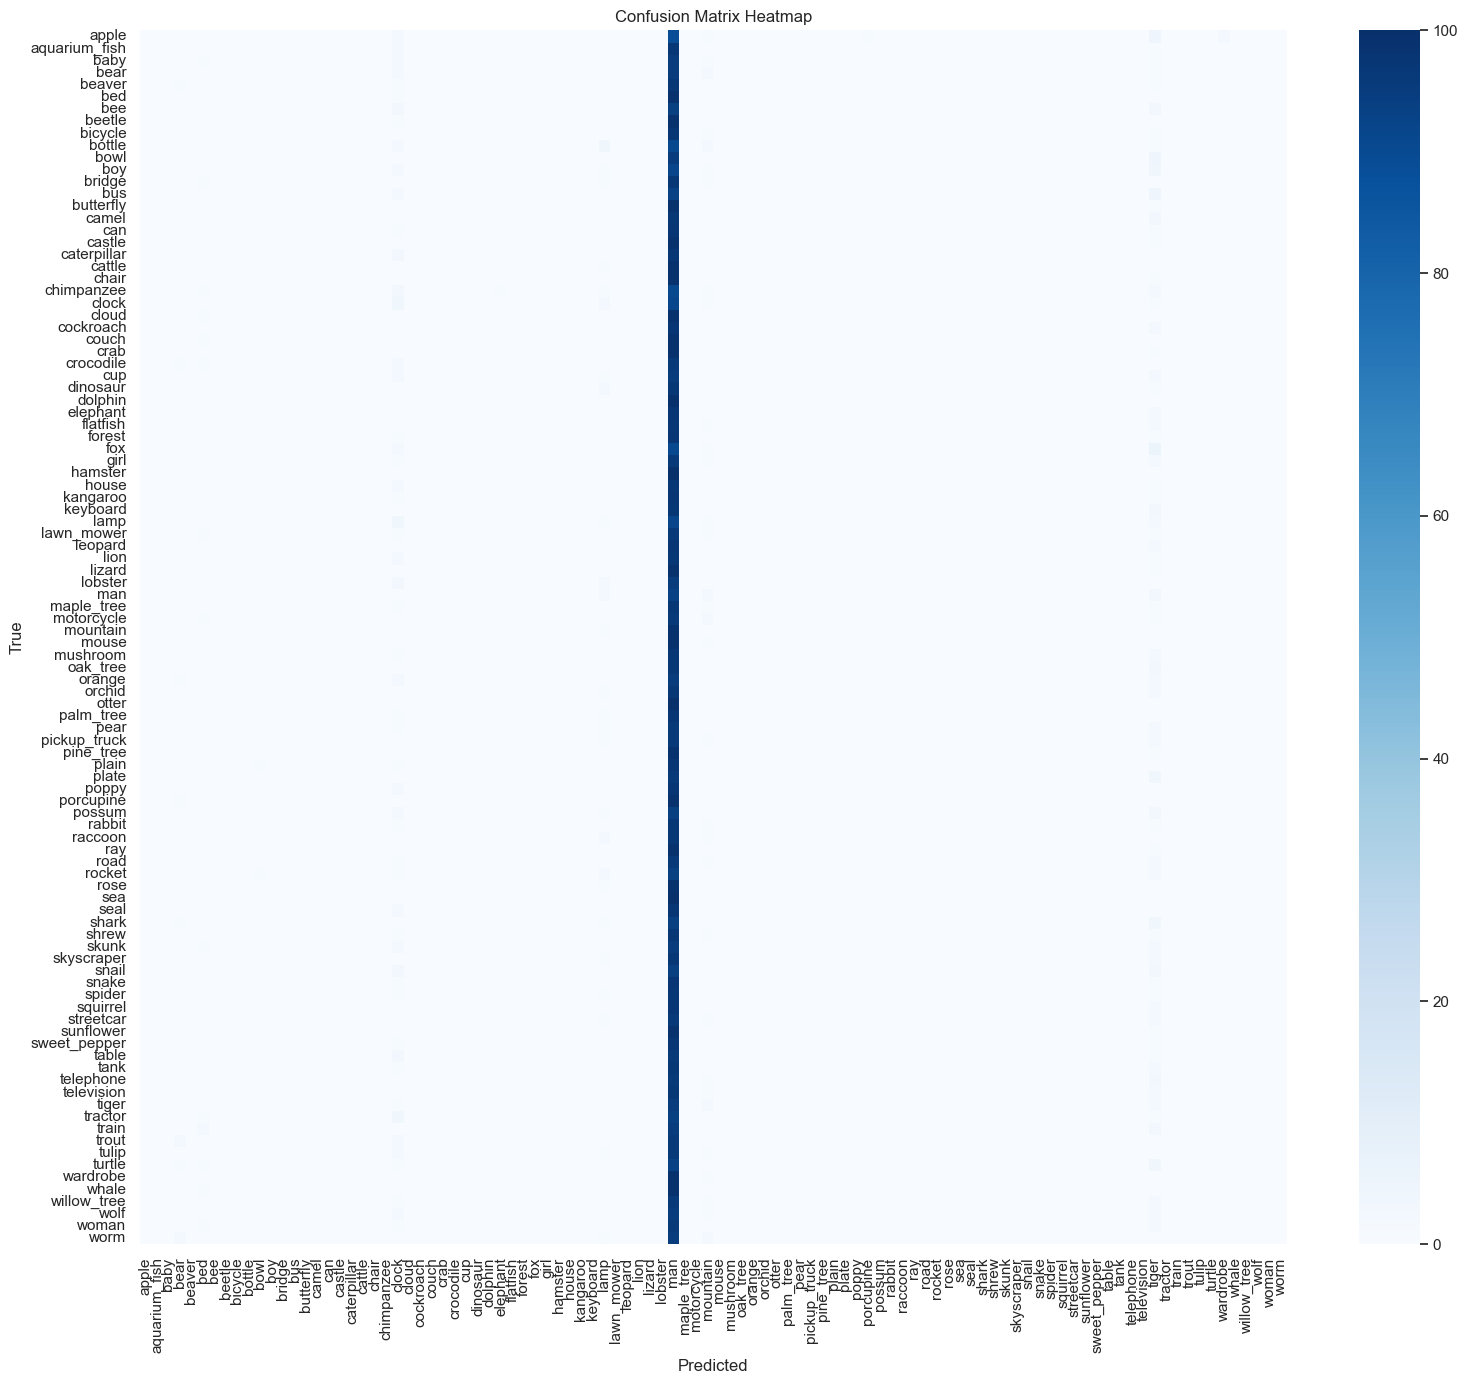

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [29]:
import seaborn as sns
import pandas as pd


plt.figure(figsize=(16,14))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()


report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
df_report = pd.DataFrame(report).transpose()
display(df_report)  


accuracies = [class_correct[i] / class_total[i] if class_total[i] > 0 else 0 for i in range(len(class_names))]
plt.figure(figsize=(10,18))
plt.barh(class_names, [a*100 for a in accuracies], color='#4fc3f7')
plt.xlabel('Accuracy (%)')
plt.title('Per-Class Accuracy')
plt.tight_layout()
plt.show()


sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])
print("Best Validation Accuracy:", max(history.history['val_accuracy']))

Final Training Accuracy: 0.5685799717903137
Final Validation Accuracy: 0.5885000228881836
Best Validation Accuracy: 0.599399983882904


## GUI,Autocaptioning,Top 3 Predictions

In [17]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

def open_file():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img_resized = img.resize((200, 200))
        img_tk = ImageTk.PhotoImage(img_resized)
        panel.config(image=img_tk)
        panel.image = img_tk

        pred_class = predict_image(file_path)
        import random
        caption_list = captions_dict.get(pred_class, ["No caption available."])
        if isinstance(caption_list, list):
            caption = random.choice(caption_list)
        else:
            caption = caption_list
        result_label.config(text=f"Prediction: {pred_class}\n{caption}")

       
        top3 = predict_image_with_top3(file_path)
        top3_text = "Top 3 Predictions:\n"
        for cname, prob in top3:
            top3_text += f"{cname}: {prob*100:.2f}%\n"
        top3_label.config(text=top3_text)

       
        fig = plt.Figure(figsize=(3,2), dpi=100)
        ax = fig.add_subplot(111)
        classes = [c for c, _ in top3]
        probs = [p*100 for _, p in top3]
        ax.bar(classes, probs, color=['#4fc3f7', '#1976d2', '#2a4d69'])
        ax.set_ylabel('Probability (%)')
        ax.set_title('Top 3 Prediction Probabilities')
        ax.set_ylim(0, 100)
        for i, v in enumerate(probs):
            ax.text(i, v+2, f"{v:.1f}%", ha='center', fontweight='bold')
        for widget in chart_frame.winfo_children():
            widget.destroy()
        canvas = FigureCanvasTkAgg(fig, master=chart_frame)
        canvas.draw()
        canvas.get_tk_widget().pack()

        
        for widget in samples_frame.winfo_children():
            widget.destroy()
        similar_imgs = get_similar_images(pred_class, num_images=3)
        if len(similar_imgs) > 0:
            tk.Label(samples_frame, text=f"Sample '{pred_class}' Images:", font=("Arial", 12, "bold"), bg="#f0f4fc", fg="#1976d2").pack()
            img_row = tk.Frame(samples_frame, bg="#f0f4fc")
            img_row.pack()
            for sim_img in similar_imgs:
                sim_img_arr = (sim_img * 255).astype('uint8')
                sim_pil = Image.fromarray(sim_img_arr)
                sim_pil = sim_pil.resize((64, 64))
                sim_tk = ImageTk.PhotoImage(sim_pil)
                lbl = tk.Label(img_row, image=sim_tk, bg="#f0f4fc", bd=1, relief="solid")
                lbl.image = sim_tk
                lbl.pack(side="left", padx=5, pady=5)

In [ ]:
root = tk.Tk()
root.title("CIFAR-100 Image Classifier")
root.geometry("440x700")
root.configure(bg="#f0f4fc")

title_label = tk.Label(root, text="CIFAR-100 Image Classifier", font=("Arial Rounded MT Bold", 20, "bold"), fg="#2a4d69", bg="#f0f4fc")
title_label.pack(pady=10)

panel_frame = tk.Frame(root, bg="#f0f4fc")
panel_frame.pack(pady=10)
panel = tk.Label(panel_frame, bg="#f0f4fc", bd=2, relief="groove")
panel.pack()

btn = tk.Button(root, text="Choose Image", command=open_file, font=("Arial", 14, "bold"), bg="#4fc3f7", fg="white", activebackground="#1976d2", activeforeground="white", bd=0, padx=20, pady=10)
btn.pack(pady=15)

result_label = tk.Label(root, text="Prediction: None", font=("Arial", 14), fg="#1976d2", bg="#f0f4fc", wraplength=350, justify="center")
result_label.pack(pady=10)

top3_label = tk.Label(root, text="", font=("Arial", 12), fg="#2a4d69", bg="#f0f4fc", wraplength=350, justify="center")
top3_label.pack(pady=5)

chart_frame = tk.Frame(root, bg="#f0f4fc")
chart_frame.pack(pady=5)

samples_frame = tk.Frame(root, bg="#f0f4fc")
samples_frame.pack(pady=10)

footer = tk.Label(root, font=("Arial", 10, "italic"), fg="#4fc3f7", bg="#f0f4fc")
footer.pack(side="bottom", pady=10)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


## Hyperparameter Setup

In [12]:
# --- Hyperparameter Setup ---
BATCH_SIZE = 64
EPOCHS = 30
LEARNING_RATE = 0.001
L2_REG = 0.001
DROPOUT1 = 0.3
DROPOUT2 = 0.4
DROPOUT3 = 0.5

print("Hyperparameters:")
print(f"BATCH_SIZE = {BATCH_SIZE}")
print(f"EPOCHS = {EPOCHS}")
print(f"LEARNING_RATE = {LEARNING_RATE}")
print(f"L2_REG = {L2_REG}")
print(f"DROPOUT1 = {DROPOUT1}")
print(f"DROPOUT2 = {DROPOUT2}")
print(f"DROPOUT3 = {DROPOUT3}")

Hyperparameters:
BATCH_SIZE = 64
EPOCHS = 30
LEARNING_RATE = 0.001
L2_REG = 0.001
DROPOUT1 = 0.3
DROPOUT2 = 0.4
DROPOUT3 = 0.5
